### Exploratory Data Analysis For All Project Data

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [13]:
romantic_lines = pd.read_csv('C:\\MSAAI\\AAI-520\\Generative_ChatBot_Final\\romantic_lines_cleaned.csv')

In [14]:
romantic_lines.head()

,line_text
0,they do not
1,they do to
2,i hope so
3,she okay
4,lets go


In [15]:
romantic_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62268 entries, 0 to 62267
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   line_text  62261 non-null  object
dtypes: object(1)
memory usage: 486.6+ KB


In [19]:
romantic_lines = pd.DataFrame(romantic_lines['line_text'].dropna().reset_index(drop=True))

In [20]:
romantic_lines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62261 entries, 0 to 62260
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   line_text  62261 non-null  object
dtypes: object(1)
memory usage: 486.5+ KB


In [21]:
# Download stopwords list
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gabri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Clean the text and remove stopwords
words = " ".join(romantic_lines['line_text']).split()
filtered_words = [word for word in words if word.lower() not in stop_words]

In [23]:
cloud_text = " ".join(filtered_words)
# cloud_text = " ".join(line for line in cleaned_lines_df['line_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis', max_words=200).generate(cloud_text)

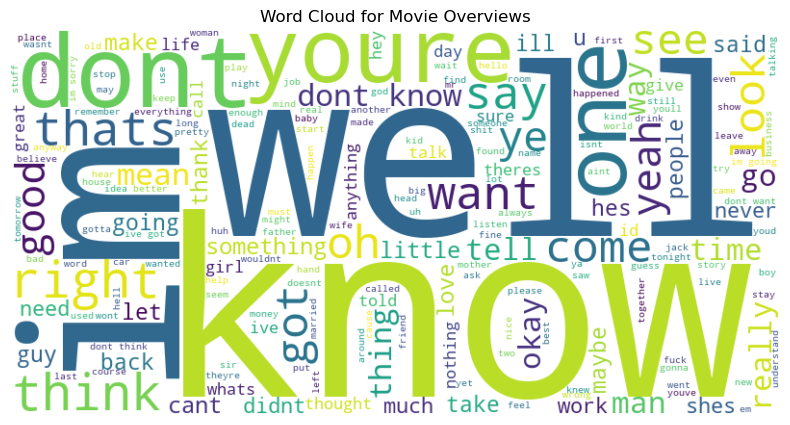

In [24]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Movie Overviews')
plt.show()

In [25]:
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(20)
word_df = pd.DataFrame(common_words, columns=['word', 'count'])

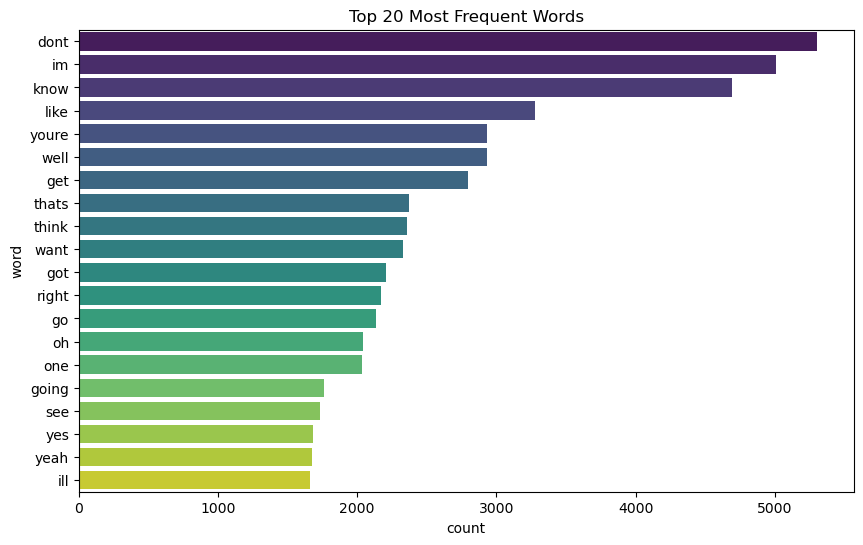

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=word_df, palette='viridis')
plt.title("Top 20 Most Frequent Words")
plt.show()

An observation made while comparing the results of the word cloud and the barplot, is that the top words are in different order in both cases.  



In [40]:
romantic_lines['word_count'] = romantic_lines['line_text'].apply(lambda x: len(x.split()))

average_word_count = romantic_lines['word_count'].mean()
print(f"Average number of words per line: {average_word_count}")

Average number of words per line: 10.289266153772024


Plotting the distribution of line length in words: 

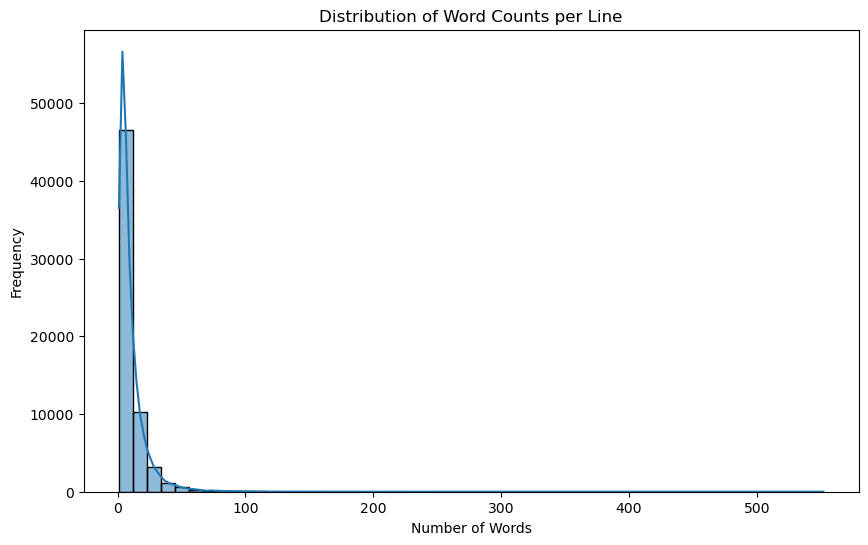

In [39]:
plt.figure(figsize=(10, 6))
sns.histplot(romantic_lines['word_count'], bins=50, kde=True)
plt.title('Distribution of Word Counts per Line')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()